This notebook: 
1. loads disp rate maps for intervals. Choose small regions/boxes to do following steps in. Do a few.
2. loads amp dispersion, wrap error, and high pass phase files.
3. set ranges of values for each criteria above.
4. loop through the ranges of criteria thresholds, count number of pix are in the range, calculate distribution of velocities in that range, save the mean, median, upper quartile, lower quartile, min, and max for box and whisker plot. 
5. Plot the range (center of each range) vs. the velocities (boxes and whiskers)
6. 

This notebook was copied and edited on 7-3-23.

***

In [1]:
# import stuff
import os,sys
import glob
import pandas as pd
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
%matplotlib  widget 

In [2]:
# choose 'filt' or 'unfilt'
key1 = 'unfilt'
# choose one: 'avg_val' or 'ref_box' or 'ref_pix'
key2 = 'ref_pix'

In [3]:
# this one is to pick out the dates 
datesDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/'
# shape of unwrapped igrams
dx = 3000
dy = 750

# larger cropped area with western mountains 
dx = 4000
dy = 1100

# load in dates, make sure they are in order
dates = [os.path.basename(x) for x in glob.glob(datesDir+"SLC_vh/2*")]; dates = sorted(dates)
nd = len(dates); numIgrams = nd-1
# set the driver first, only do once.
#driver=gdal.GetDriverByName('ISCE')

In [4]:
start_indices = [0,47,108,147,0,0,107]
end_indices = [46,107,146,numIgrams,88,numIgrams,153]
num_intervals = len(end_indices)
# the last one I just added (4-12-23) as a totally dry period

for i in range(num_intervals):
    print('interval '+str(i)+': '+str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]]))
print(str(num_intervals)+' intervals.')

interval 0: 20170510-20181125
interval 1: 20181207-20200412
interval 2: 20200418-20201208
interval 3: 20201214-20220108
interval 4: 20170510-20191220
interval 5: 20170510-20220108
interval 6: 20200412-20210119
7 intervals.


In [5]:
disp_rates = np.ndarray((num_intervals,dy,dx),dtype='float')
disp_rates_errors = np.ndarray((num_intervals,dy,dx),dtype='float')
saveDir = '/data/ocp4/LagunaSalada/Data_and_Figs/12_rate_inversions/disp_rate_maps_with_western_mtns/'
for j in range(num_intervals):    
    # read in disp rate file + rmse file
    fileName = 'interval_'+str(j)+'_'+key1+'_weighted_ref_to_'+key2+'.r4'
    errorFileName = 'interval_'+str(j)+'_'+key1+'_weighted_ref_to_'+key2+'_residual_std.r4'
    f1 = gdal.Open(saveDir+fileName, gdal.GA_ReadOnly)
    disp_rates[j] = f1.ReadAsArray()
    f1 = None
    f1 = gdal.Open(saveDir+errorFileName, gdal.GA_ReadOnly)
    disp_rates_errors[j] = f1.ReadAsArray()
    f1 = None
    print('interval '+str(j)+' disp rate map + errors loaded.')

interval 0 disp rate map + errors loaded.
interval 1 disp rate map + errors loaded.
interval 2 disp rate map + errors loaded.
interval 3 disp rate map + errors loaded.
interval 4 disp rate map + errors loaded.
interval 5 disp rate map + errors loaded.
interval 6 disp rate map + errors loaded.


In [6]:
# define boxes I want to look at 
from matplotlib.patches import Rectangle
box1x = [2300,2800];  box1dx = box1x[1]-box1x[0]
box1y = [300, 400];   box1dy = box1y[1]-box1y[0]
box2x = [1500, 2000]; box2dx = box2x[1]-box2x[0]
#box2y = [75, 175];    
box2y = [125, 200];   box2dy = box2y[1]-box2y[0]
box3x = [3500, 4000];  box3dx = box3x[1]-box3x[0]
box3y = [725, 800];   box3dy = box3y[1]-box3y[0]
box4x = [2150,2650];  box4dx = box4x[1]-box4x[0]
box4y = [600, 700];   box4dy = box4y[1]-box4y[0]

In [41]:
# define second set of boxes. First ones weren't good enough.
from matplotlib.patches import Rectangle
box1x = [3000,3500];  box1dx = box1x[1]-box1x[0]
box1y = [300, 400];   box1dy = box1y[1]-box1y[0]
box2x = [2000, 2500]; box2dx = box2x[1]-box2x[0] 
box2y = [125, 200];   box2dy = box2y[1]-box2y[0]
box3x = [3500, 4000];  box3dx = box3x[1]-box3x[0]
box3y = [650, 750];   box3dy = box3y[1]-box3y[0]
box4x = [2500,3000];  box4dx = box4x[1]-box4x[0]
box4y = [600, 700];   box4dy = box4y[1]-box4y[0]

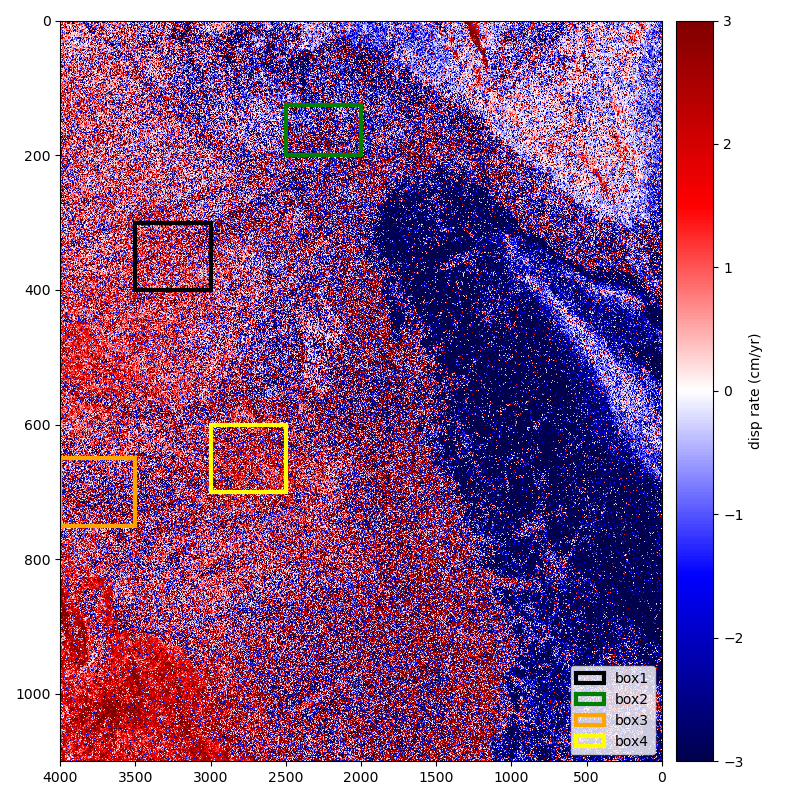

In [42]:
# plot them.
plt.figure(figsize=(8,8),tight_layout=True)
plt.imshow(np.mean(disp_rates,axis=0), aspect='auto', vmin=-3.0,vmax=3.0,\
            interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
#plt.xticks([]); plt.yticks([])
plt.gca().add_patch(Rectangle((box1x[0],box1y[0]),box1dx,box1dy,edgecolor='k',facecolor='none',lw=3,label='box1'))
plt.gca().add_patch(Rectangle((box2x[0],box2y[0]),box2dx,box2dy,edgecolor='green',facecolor='none',lw=3,label='box2'))
plt.gca().add_patch(Rectangle((box3x[0],box3y[0]),box3dx,box3dy,edgecolor='orange',facecolor='none',lw=3,label='box3'))
plt.gca().add_patch(Rectangle((box4x[0],box4y[0]),box4dx,box4dy,edgecolor='yellow',facecolor='none',lw=3,label='box4'))
plt.legend(loc='lower right')
plt.show()

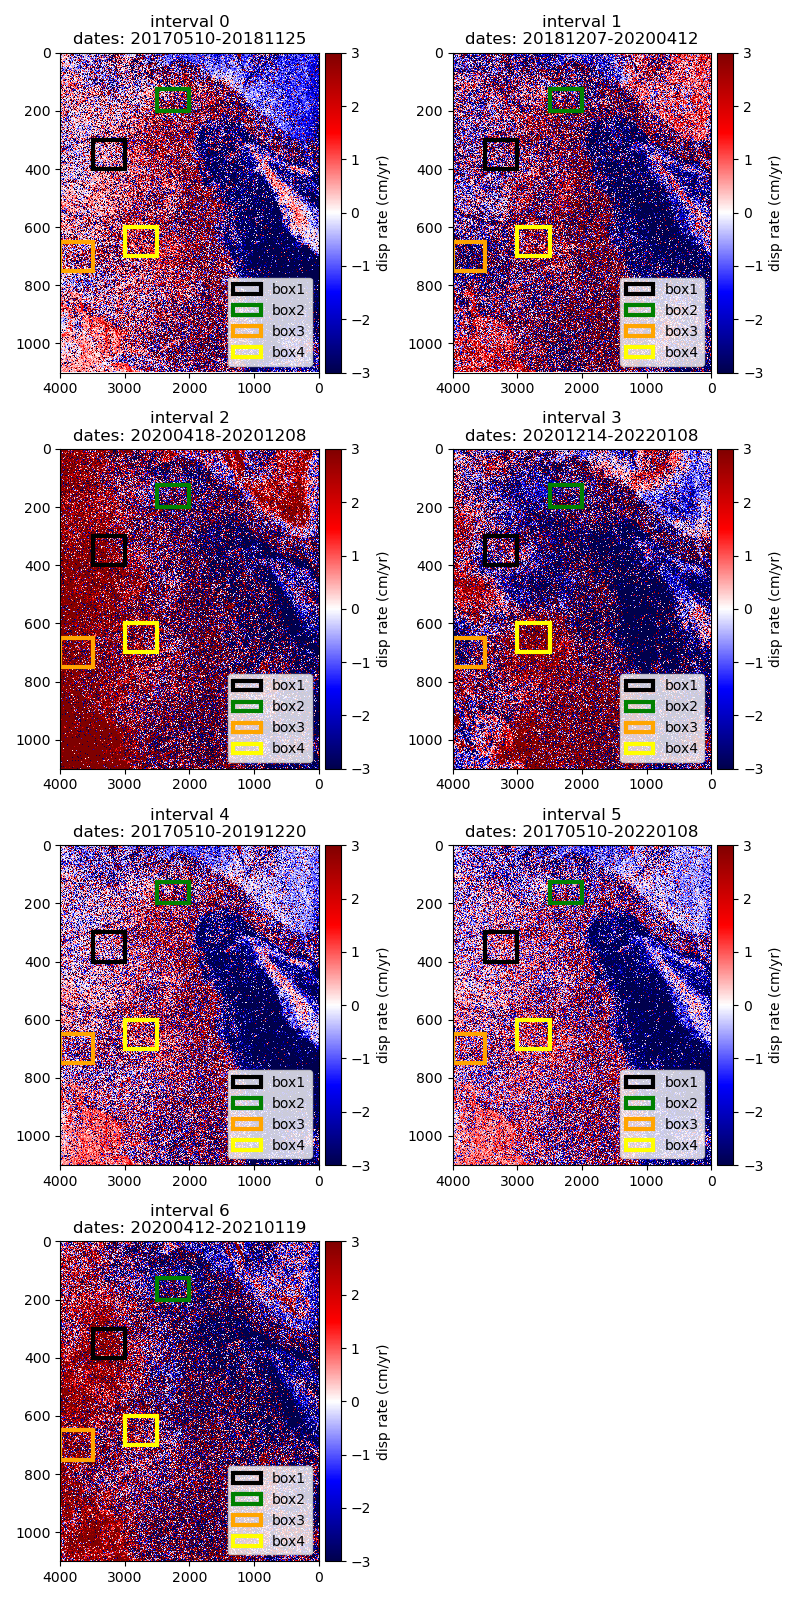

In [43]:
# plot them.
plt.figure(figsize=(8,16),tight_layout=True); count=1
for i in range(num_intervals):
    plt.subplot(4,2,count)
    plt.imshow(disp_rates[i], aspect='auto', vmin=-3.0,vmax=3.0,\
                interpolation='nearest')
    plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
    plt.set_cmap('seismic')
    plt.xlim([dx,0]); plt.ylim([dy,0])
    #plt.xticks([]); plt.yticks([])
    plt.gca().add_patch(Rectangle((box1x[0],box1y[0]),box1dx,box1dy,edgecolor='k',facecolor='none',lw=3,label='box1'))
    plt.gca().add_patch(Rectangle((box2x[0],box2y[0]),box2dx,box2dy,edgecolor='green',facecolor='none',lw=3,label='box2'))
    plt.gca().add_patch(Rectangle((box3x[0],box3y[0]),box3dx,box3dy,edgecolor='orange',facecolor='none',lw=3,label='box3'))
    plt.gca().add_patch(Rectangle((box4x[0],box4y[0]),box4dx,box4dy,edgecolor='yellow',facecolor='none',lw=3,label='box4'))
    plt.legend(loc='lower right')
    plt.title('interval '+str(i)+'\ndates: '+str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]]))
    count = count+1
plt.show()

Now load files:
1. amp dispersion
2. triplet unwrapping consistency/wrap errors
3. high pass phase 

In [44]:
loadDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/'

file_name = 'amp_dispersion.r4' 
f1 = gdal.Open(loadDir+file_name, gdal.GA_ReadOnly)
amp_dispersion = f1.ReadAsArray(); f1 = None
print('Amplitude dispersion for each pixel loaded.')

file_name = 'unfilt_unwrapped/wrap_err.i1' 
f1 = gdal.Open(loadDir+file_name, gdal.GA_ReadOnly)
wrap_err = f1.ReadAsArray(); f1 = None
print('wrap errors for each pixel loaded.')

file_name = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/hpcor.r4' 
f1 = gdal.Open(file_name, gdal.GA_ReadOnly)
hp = f1.ReadAsArray(); f1 = None
# cropped area
x1 = 18000; x2 = 14000
y1 = 2100; y2 = 1000
hp_phs = hp[y2:y1,x2:x1]
print('high pass phase for each pixel loaded.')

Amplitude dispersion for each pixel loaded.
wrap errors for each pixel loaded.
high pass phase for each pixel loaded.


Plot the three criteria: average behavior of each pixel over entire interval.

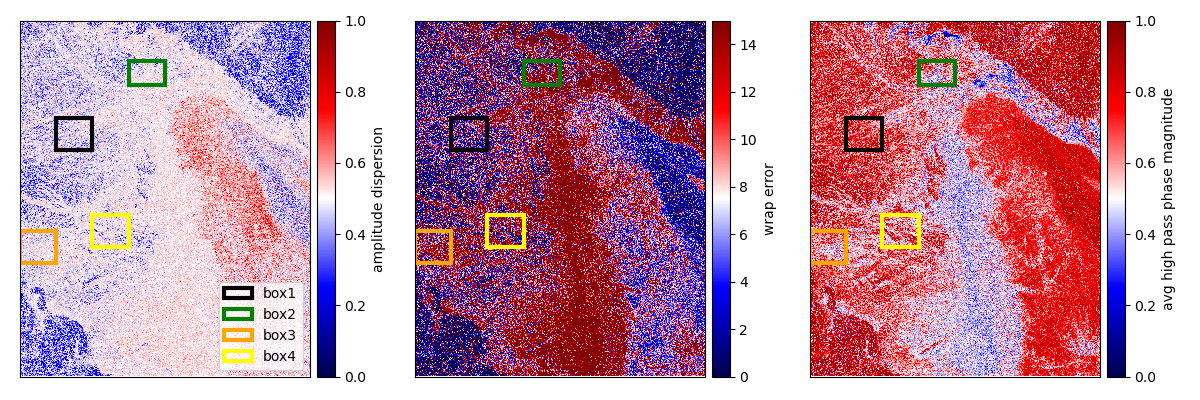

In [45]:
plt.figure(figsize=(12,4),tight_layout=True)
plt.subplot(1,3,1)
plt.imshow(amp_dispersion, aspect='auto',interpolation='nearest',vmin=0,vmax=1.0)
plt.colorbar(orientation='vertical',pad=0.02,label='amplitude dispersion')
plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
plt.gca().add_patch(Rectangle((box1x[0],box1y[0]),box1dx,box1dy,edgecolor='k',facecolor='none',lw=3,label='box1'))
plt.gca().add_patch(Rectangle((box2x[0],box2y[0]),box2dx,box2dy,edgecolor='green',facecolor='none',lw=3,label='box2'))
plt.gca().add_patch(Rectangle((box3x[0],box3y[0]),box3dx,box3dy,edgecolor='orange',facecolor='none',lw=3,label='box3'))
plt.gca().add_patch(Rectangle((box4x[0],box4y[0]),box4dx,box4dy,edgecolor='yellow',facecolor='none',lw=3,label='box4'))
plt.legend(loc='lower right')
plt.subplot(1,3,2)
plt.imshow(wrap_err, aspect='auto',interpolation='nearest',vmin=0,vmax=15)
plt.colorbar(orientation='vertical',pad=0.02,label='wrap error')
plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
plt.gca().add_patch(Rectangle((box1x[0],box1y[0]),box1dx,box1dy,edgecolor='k',facecolor='none',lw=3,label='box1'))
plt.gca().add_patch(Rectangle((box2x[0],box2y[0]),box2dx,box2dy,edgecolor='green',facecolor='none',lw=3,label='box2'))
plt.gca().add_patch(Rectangle((box3x[0],box3y[0]),box3dx,box3dy,edgecolor='orange',facecolor='none',lw=3,label='box3'))
plt.gca().add_patch(Rectangle((box4x[0],box4y[0]),box4dx,box4dy,edgecolor='yellow',facecolor='none',lw=3,label='box4'))
plt.subplot(1,3,3)
plt.imshow(hp_phs, aspect='auto',interpolation='nearest',vmin=0,vmax=1.0)
plt.colorbar(orientation='vertical',pad=0.02,label='avg high pass phase magnitude')
plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
plt.gca().add_patch(Rectangle((box1x[0],box1y[0]),box1dx,box1dy,edgecolor='k',facecolor='none',lw=3,label='box1'))
plt.gca().add_patch(Rectangle((box2x[0],box2y[0]),box2dx,box2dy,edgecolor='green',facecolor='none',lw=3,label='box2'))
plt.gca().add_patch(Rectangle((box3x[0],box3y[0]),box3dx,box3dy,edgecolor='orange',facecolor='none',lw=3,label='box3'))
plt.gca().add_patch(Rectangle((box4x[0],box4y[0]),box4dx,box4dy,edgecolor='yellow',facecolor='none',lw=3,label='box4'))
plt.show()

Make a colormap where Nans are different color: try green.

In [46]:
seismic2 = plt.cm.get_cmap("seismic").copy()
seismic2.set_bad(color='green')
print('colormap made where NANs will be green.')

colormap made where NANs will be green.


In [60]:
# which interval? 
j = 5

# choose one 
boxKey = 'box1'

if boxKey == 'box1':
    boxX = box1x;    boxY = box1y
    boxdx = box1dx;  boxdy = box1dy
    print('using box 1.')
elif boxKey == 'box2':
    boxX = box2x;    boxY = box2y
    boxdx = box2dx;  boxdy = box2dy   
    print('using box 2.')
elif boxKey == 'box3':
    boxX = box3x;    boxY = box3y
    boxdx = box3dx;  boxdy = box3dy  
    print('using box 3.') 
elif boxKey == 'box4':
    boxX = box4x;   boxY = box4y
    boxdx = box4dx; boxdy = box4dy
    print('using box 4.')   
     
print('box is '+str(boxdy)+' by '+str(boxdx)+' pixels. '+str(boxdx*boxdy)+' total.')

using box 1.
box is 100 by 500 pixels. 50000 total.


Find min, max, median, and 1sigma above, 1sigma below values for each dataset. 

In [61]:
print('Amp Dispersion:')
temp = amp_dispersion[boxY[0]:boxY[1],boxX[0]:boxX[1]].flatten()
#print(np.shape(temp))
print('min: '+str(min(temp)))
print('max: '+str(max(temp)))
print('median: '+str(np.median(temp)))
print('mean: '+str(np.mean(temp)))
print('sigma: '+str(np.std(temp)))
print('median+3sigma: '+str(np.median(temp)+3*np.std(temp)))
print('median-3sigma: '+str(np.median(temp)-3*np.std(temp)))

print('\nWrap Error:')
temp = wrap_err[boxY[0]:boxY[1],boxX[0]:boxX[1]].flatten()
#print(np.shape(temp))
print('min: '+str(min(temp)))
print('max: '+str(max(temp)))
print('median: '+str(np.median(temp)))
print('mean: '+str(np.mean(temp)))
print('sigma: '+str(np.std(temp)))
print('median+3sigma: '+str(np.median(temp)+3*np.std(temp)))
print('median-3sigma: '+str(np.median(temp)-3*np.std(temp)))

print('\nhp phase:')
temp = hp_phs[boxY[0]:boxY[1],boxX[0]:boxX[1]].flatten()
#print(np.shape(temp))
print('min: '+str(min(temp)))
print('max: '+str(max(temp)))
print('median: '+str(np.median(temp)))
print('mean: '+str(np.mean(temp)))
print('sigma: '+str(np.std(temp)))
print('median+3sigma: '+str(np.median(temp)+3*np.std(temp)))
print('median-3sigma: '+str(np.median(temp)-3*np.std(temp)))

Amp Dispersion:
min: 0.1252315
max: 1.0368693
median: 0.48437378
mean: 0.4749875
sigma: 0.07291198
median+3sigma: 0.7031097114086151
median-3sigma: 0.2656378448009491

Wrap Error:
min: 0
max: 37
median: 6.0
mean: 7.01224
sigma: 5.712488965626105
median+3sigma: 23.137466896878315
median-3sigma: -11.137466896878315

hp phase:
min: 0.13548206
max: 0.9881912
median: 0.6983774
mean: 0.6993002
sigma: 0.13146251
median+3sigma: 1.0927649140357971
median-3sigma: 0.30398982763290405


Do MORE ranges, not just 9. 49 ranges now. 

In [62]:
amp_disps = np.linspace(0.0,0.65,50)
print('amp disp values: '+str(amp_disps)+', '+str(np.shape(amp_disps)))

wrap_errs = np.linspace(0,35,50)
print('wrap err values: '+str(wrap_errs)+', '+str(np.shape(wrap_errs)))

hp_phss = np.linspace(0.3,1.0,50)
print('hp phs values: '+str(hp_phss)+', '+str(np.shape(hp_phss)))
num_ranges = np.shape(amp_disps)[0]-1

print(str(num_ranges)+' ranges of criteria to loop through.')

amp disp values: [0.         0.01326531 0.02653061 0.03979592 0.05306122 0.06632653
 0.07959184 0.09285714 0.10612245 0.11938776 0.13265306 0.14591837
 0.15918367 0.17244898 0.18571429 0.19897959 0.2122449  0.2255102
 0.23877551 0.25204082 0.26530612 0.27857143 0.29183673 0.30510204
 0.31836735 0.33163265 0.34489796 0.35816327 0.37142857 0.38469388
 0.39795918 0.41122449 0.4244898  0.4377551  0.45102041 0.46428571
 0.47755102 0.49081633 0.50408163 0.51734694 0.53061224 0.54387755
 0.55714286 0.57040816 0.58367347 0.59693878 0.61020408 0.62346939
 0.63673469 0.65      ], (50,)
wrap err values: [ 0.          0.71428571  1.42857143  2.14285714  2.85714286  3.57142857
  4.28571429  5.          5.71428571  6.42857143  7.14285714  7.85714286
  8.57142857  9.28571429 10.         10.71428571 11.42857143 12.14285714
 12.85714286 13.57142857 14.28571429 15.         15.71428571 16.42857143
 17.14285714 17.85714286 18.57142857 19.28571429 20.         20.71428571
 21.42857143 22.14285714 22.8571428

Define a function to filter/smooth an input masked array.<br>
Define a function to take a masked array and return the same array but with Nans instead of ---'s 

In [63]:
def mask_smooth(masked_array,disp_rates,dy,dx):
    mask_y,mask_x = np.nonzero(masked_array)    # find pix where values haven't been masked
    mask = np.zeros((dy,dx))                    # initialize an array of zeros that's the same size as input for the mask
    mask[mask_y,mask_x] = 1.0                   # put 1's in the spots that had real values 
    alooks = 4                                  # amount to filter in the azimuth/y direction
    rlooks = 20                                 # amount to filter in the range/x direction
    mask_filt = gaussian_filter(mask,sigma=[alooks/2,rlooks/2])     # filter the mask to smear it out
    Nans_y,Nans_x = np.where(mask_filt==0)      # find where the filtered mask didn't reach (which pix are still 0)
    vels_masked = np.zeros((dy,dx))             # initialize array of zeros that's the same size as input for the velocities
    vels_masked[mask_y,mask_x] = disp_rates[mask_y,mask_x]      # put in the "good" disp rates into the masked vels array.
    vels_filt = gaussian_filter(vels_masked,sigma=[alooks/2,rlooks/2])  # filter the vels_masked 
    ab = vels_filt / mask_filt                  # divide the two
    #ab[mask_y,mask_x] = disp_rates[mask_y,mask_x]   # put back in the good values. OPTIONAL
    ab[Nans_y,Nans_x] = np.nan
    return ab
def masked_pix_to_nans(masked_array,dy,dx):
    mask_y,mask_x = np.nonzero(masked_array)
    mask = np.zeros((dy,dx))
    mask[mask_y,mask_x] = 1.0
    Nans_y,Nans_x = np.where(mask==0)
    ab = masked_array
    ab[Nans_y,Nans_x] = np.nan
    return ab

Loop through the ranges and mask the velocity map based on that range. 

In [64]:
# this holds the masked maps for each range of criteria values, with masked values turned into Nans 
ab_amp_disp = np.ndarray((num_ranges,dy,dx),dtype='float')
ab_wrap_err = np.ndarray((num_ranges,dy,dx),dtype='float')
ab_hp_phs = np.ndarray((num_ranges,dy,dx),dtype='float')

for i in range(num_ranges): #num_ranges
    # amp disp
    amp_disp_temp = np.ma.masked_where(amp_dispersion<amp_disps[i],disp_rates[j])   # mask where values are smaller than range
    amp_disp_temp = np.ma.masked_where(amp_dispersion>amp_disps[i+1],amp_disp_temp) # mask where values are larger than range
    ab_amp_disp[i] = masked_pix_to_nans(amp_disp_temp,dy,dx)

    # THIS was for troubleshooting.
    # plt.figure(figsize=(4,4),tight_layout=True)
    # plt.imshow(amp_disp_temp,cmap=seismic2,aspect='auto', vmin=-3.0,vmax=3.0,\
    #             interpolation='nearest')
    # plt.colorbar(); plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
    # plt.show()

    # wrap error
    wrap_err_temp = np.ma.masked_where(wrap_err<wrap_errs[i],disp_rates[j])   # mask where values are smaller than range
    wrap_err_temp = np.ma.masked_where(wrap_err>wrap_errs[i+1],wrap_err_temp) # mask where values are larger than range
    ab_wrap_err[i] = masked_pix_to_nans(wrap_err_temp,dy,dx)
    # hp phase
    hp_phs_temp = np.ma.masked_where(hp_phs<hp_phss[i],disp_rates[j])   # mask where values are smaller than range
    hp_phs_temp = np.ma.masked_where(hp_phs>hp_phss[i+1],hp_phs_temp) # mask where values are larger than range
    ab_hp_phs[i] = masked_pix_to_nans(hp_phs_temp,dy,dx)


Pull out the values from the box we want to use. 

In [65]:
# each column is a dx,dy flattened dataset for each range. 
box_whisker_amp_disp_data = np.ndarray((boxdx*boxdy,num_ranges),dtype='float')
box_whisker_wrap_err_data = np.ndarray((boxdx*boxdy,num_ranges),dtype='float')
box_whisker_hp_phs_data = np.ndarray((boxdx*boxdy,num_ranges),dtype='float')

for i in range(num_ranges):
    # pull out just that box of data
    box_whisker_amp_disp_data[:,i] = ab_amp_disp[i,boxY[0]:boxY[1],boxX[0]:boxX[1]].flatten()
    box_whisker_wrap_err_data[:,i] = ab_wrap_err[i,boxY[0]:boxY[1],boxX[0]:boxX[1]].flatten()
    box_whisker_hp_phs_data[:,i]   = ab_hp_phs[i,boxY[0]:boxY[1],boxX[0]:boxX[1]].flatten()

Calculate the center criteria value for each criteria range. For plotting.

In [66]:
amp_disp_centers = np.diff(amp_disps)/2+amp_disps[0:-1]
amp_disp_centers_2 = np.linspace(amp_disp_centers[0],amp_disp_centers[-1],num_ranges)
amp_disp_centers_3 = []
for i in range(len(amp_disp_centers_2)):
    center = "%.2f" % amp_disp_centers_2[i]
    amp_disp_centers_3.append(center)
#print(amp_disp_centers)
print(amp_disp_centers_2)
print(amp_disp_centers_3) # list of strings instead 

wrap_err_centers = np.diff(wrap_errs)/2+wrap_errs[0:-1]
wrap_err_centers_2 = np.linspace(wrap_err_centers[0],wrap_err_centers[-1],num_ranges)
wrap_err_centers_3 = []
for i in range(len(wrap_err_centers_2)):
    center = "%.3f" % wrap_err_centers_2[i]
    wrap_err_centers_3.append(center)
#print(wrap_err_centers)
print(wrap_err_centers_2)
print(wrap_err_centers_3)

hp_phs_centers = np.diff(hp_phss)/2+hp_phss[0:-1]
hp_phs_centers_2 = np.linspace(hp_phs_centers[0],hp_phs_centers[-1],num_ranges)
hp_phs_centers_3 = []
for i in range(len(hp_phs_centers_2)):
    center = "%.2f" % hp_phs_centers_2[i]
    hp_phs_centers_3.append(center)
#print(hp_phs_centers)
print(hp_phs_centers_2)
print(hp_phs_centers_3)

print('Midpoints of ranges calculated.')

[0.00663265 0.01989796 0.03316327 0.04642857 0.05969388 0.07295918
 0.08622449 0.0994898  0.1127551  0.12602041 0.13928571 0.15255102
 0.16581633 0.17908163 0.19234694 0.20561224 0.21887755 0.23214286
 0.24540816 0.25867347 0.27193878 0.28520408 0.29846939 0.31173469
 0.325      0.33826531 0.35153061 0.36479592 0.37806122 0.39132653
 0.40459184 0.41785714 0.43112245 0.44438776 0.45765306 0.47091837
 0.48418367 0.49744898 0.51071429 0.52397959 0.5372449  0.5505102
 0.56377551 0.57704082 0.59030612 0.60357143 0.61683673 0.63010204
 0.64336735]
['0.01', '0.02', '0.03', '0.05', '0.06', '0.07', '0.09', '0.10', '0.11', '0.13', '0.14', '0.15', '0.17', '0.18', '0.19', '0.21', '0.22', '0.23', '0.25', '0.26', '0.27', '0.29', '0.30', '0.31', '0.33', '0.34', '0.35', '0.36', '0.38', '0.39', '0.40', '0.42', '0.43', '0.44', '0.46', '0.47', '0.48', '0.50', '0.51', '0.52', '0.54', '0.55', '0.56', '0.58', '0.59', '0.60', '0.62', '0.63', '0.64']
[ 0.35714286  1.07142857  1.78571429  2.5         3.2142857

Now plot the box-and-whisker plots for each criteria.

In [67]:
# Filter data so that the boxplot can ignore Nans, using np.isnan
mask = ~np.isnan(box_whisker_amp_disp_data)
filtered_data_amp_disp = [d[m] for d, m in zip(box_whisker_amp_disp_data.T, mask.T)]

mask2 = ~np.isnan(box_whisker_wrap_err_data)
filtered_data_wrap_err = [d[m] for d, m in zip(box_whisker_wrap_err_data.T, mask2.T)]

mask3 = ~np.isnan(box_whisker_hp_phs_data)
filtered_data_hp_phs = [d[m] for d, m in zip(box_whisker_hp_phs_data.T, mask3.T)]

print('Now box plots can ignore NaNs.')

Now box plots can ignore NaNs.


Count how many datapoints in each range.

In [68]:
# initialize arrays that keep the number of pixels used in each range
num_pix_amp_disp = np.ndarray((num_ranges),dtype='int')
num_pix_wrap_err = np.ndarray((num_ranges),dtype='int')
num_pix_hp_phs = np.ndarray((num_ranges),dtype='int')

for i in range(num_ranges):
    #print(np.shape(filtered_data_amp_disp[i]))
    num_pix_amp_disp[i] = np.shape(filtered_data_amp_disp[i])[0]
    num_pix_wrap_err[i] = np.shape(filtered_data_wrap_err[i])[0]
    num_pix_hp_phs[i] = np.shape(filtered_data_hp_phs[i])[0]

BOXPLOTS

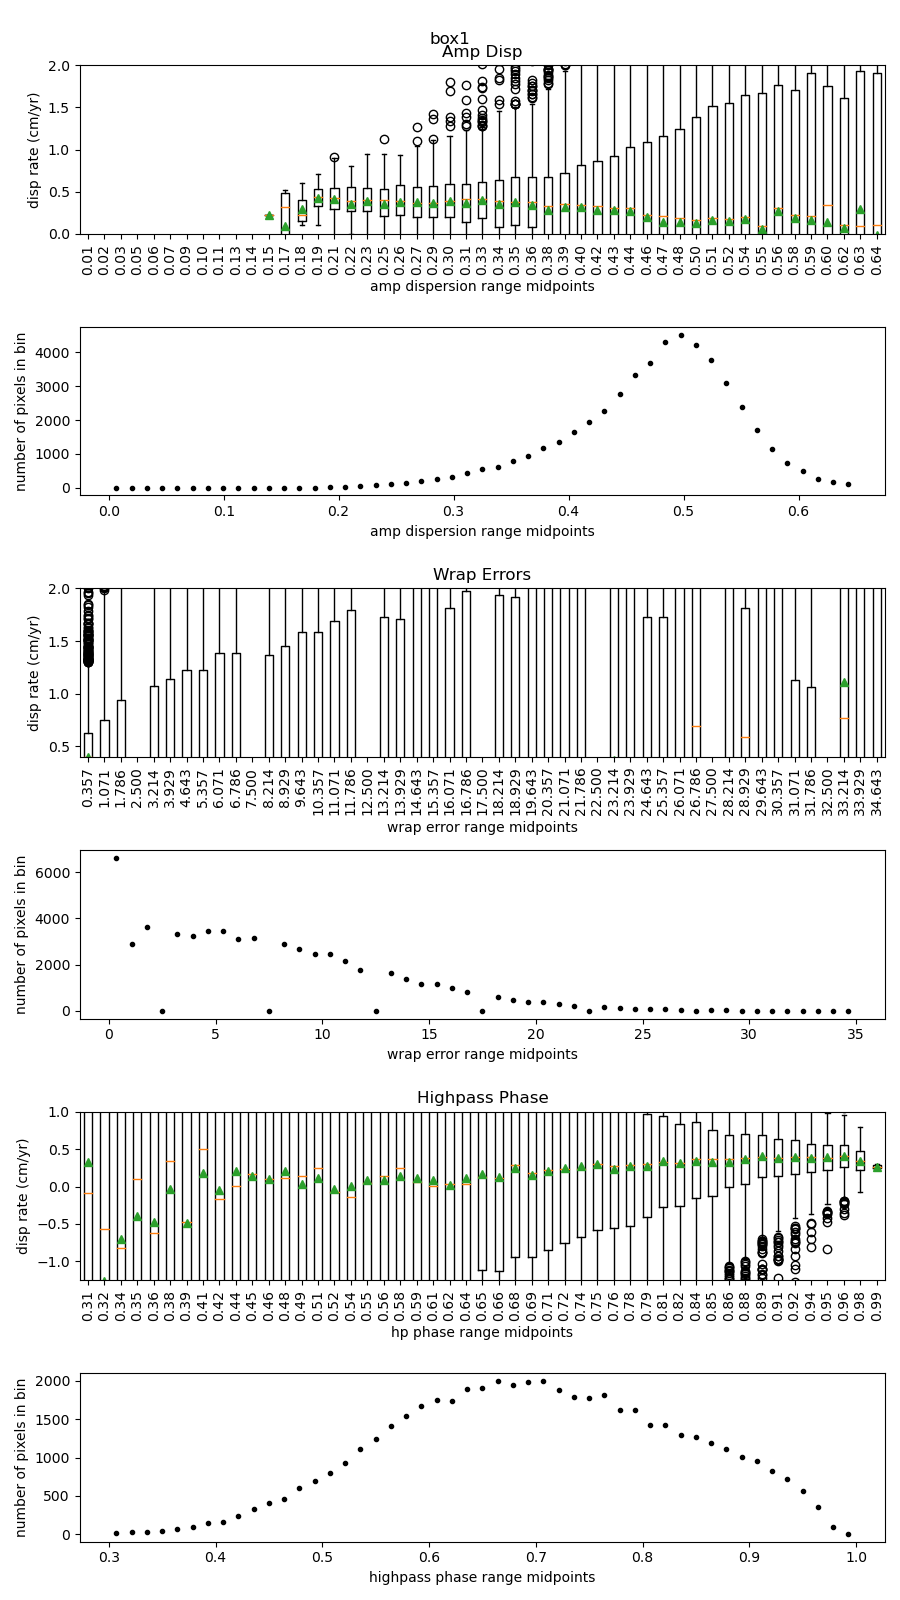

In [69]:
# plot it
plt.figure(figsize=(9,16),tight_layout=True)
plt.subplot(6,1,1)
plt.boxplot(filtered_data_amp_disp,showmeans=True,labels=amp_disp_centers_3)
plt.ylim([0,2]) # box1
#plt.ylim([-0.5,0.5]) # box2
plt.xlabel('amp dispersion range midpoints')
plt.ylabel('disp rate (cm/yr)')
plt.xticks(rotation=90)
plt.title('Amp Disp')

plt.subplot(6,1,2)
plt.plot(amp_disp_centers_2,num_pix_amp_disp,'k.')
plt.ylabel('number of pixels in bin')
plt.xlabel('amp dispersion range midpoints')

plt.subplot(6,1,3)
plt.boxplot(filtered_data_wrap_err,showmeans=True,labels=wrap_err_centers_3)
plt.ylim([0.4,2]) # box1
#plt.ylim([-0.1,0.6]) # box2
plt.xlabel('wrap error range midpoints')
plt.ylabel('disp rate (cm/yr)')
plt.xticks(rotation=90)
plt.title('Wrap Errors')

plt.subplot(6,1,4)
plt.plot(wrap_err_centers_2,num_pix_wrap_err,'k.')
plt.ylabel('number of pixels in bin')
plt.xlabel('wrap error range midpoints')

plt.subplot(6,1,5)
plt.boxplot(filtered_data_hp_phs,showmeans=True,labels=hp_phs_centers_3)
plt.ylim([-1.25,1])
plt.xlabel('hp phase range midpoints')
plt.ylabel('disp rate (cm/yr)')
plt.xticks(rotation=90)
plt.title('Highpass Phase')

plt.subplot(6,1,6)
plt.plot(hp_phs_centers_2,num_pix_hp_phs,'k.')
plt.ylabel('number of pixels in bin')
plt.xlabel('highpass phase range midpoints')

plt.suptitle(boxKey)

plt.show()

JUST PLOTTING mean and median for each range. Makes the ylim easier each time. 

/tmp/ipykernel_28051/2877009704.py:4: RuntimeWarning: Mean of empty slice
  plt.plot(amp_disp_centers_2,np.nanmean(box_whisker_amp_disp_data,axis=0),'^',c='green',label='mean')
/home/ocp4/software/anaconda3/envs/oliviaJupyter/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/tmp/ipykernel_28051/2877009704.py:37: RuntimeWarning: Mean of empty slice
  plt.plot(wrap_err_centers_2,np.nanmean(box_whisker_wrap_err_data,axis=0),'^',c='green',label='mean')
/home/ocp4/software/anaconda3/envs/oliviaJupyter/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


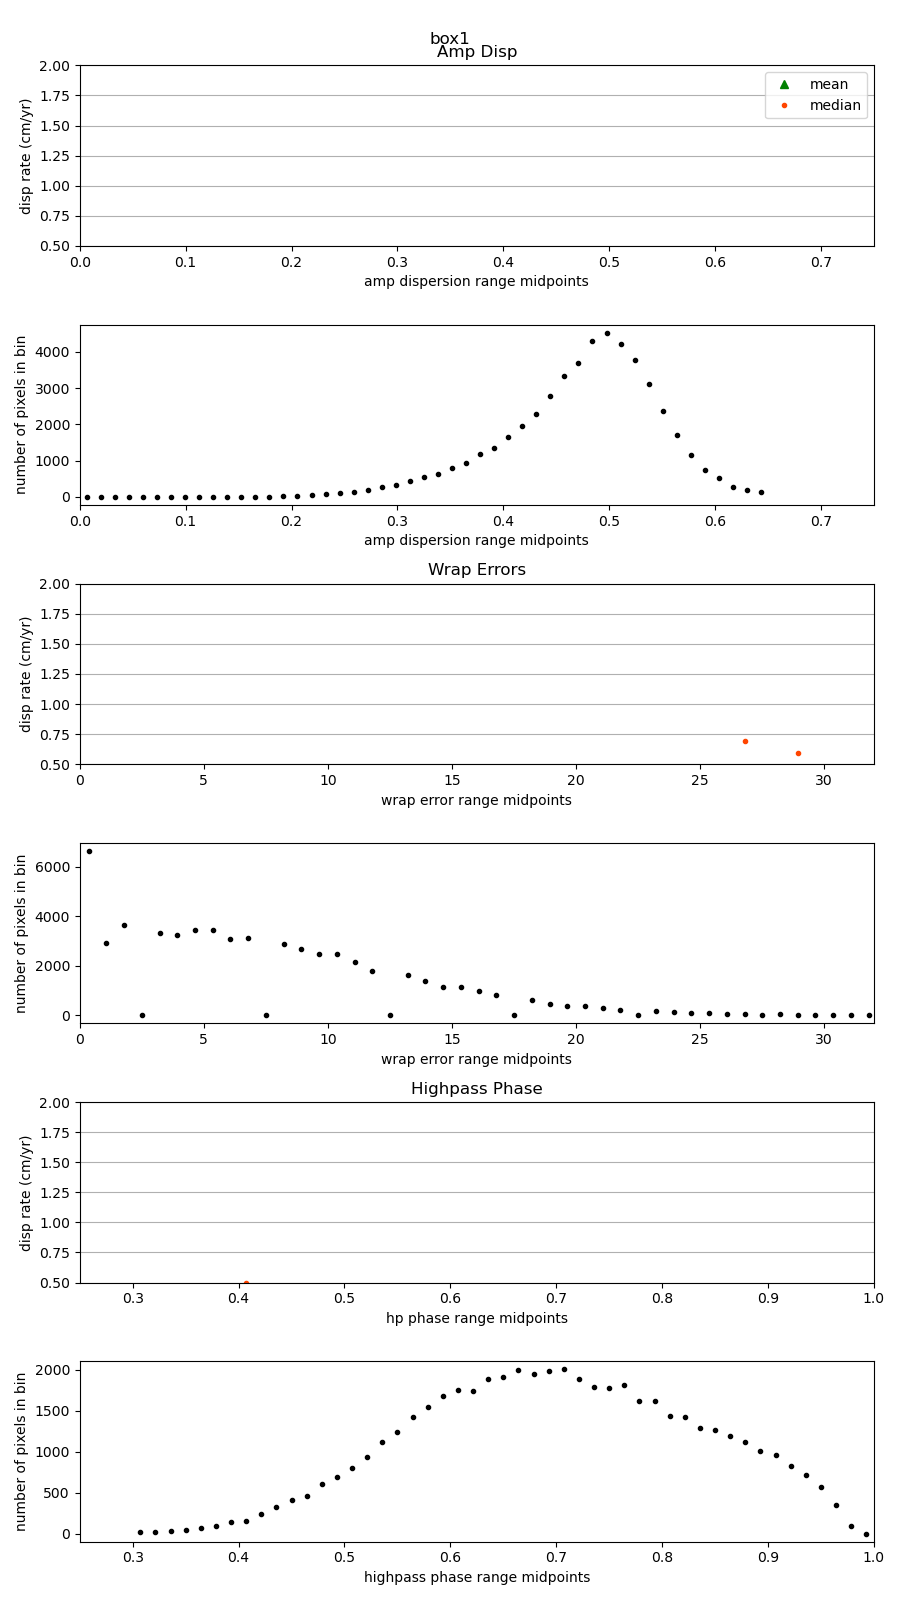

In [70]:
# plot it
plt.figure(figsize=(9,16),tight_layout=True)
plt.subplot(6,1,1)
plt.plot(amp_disp_centers_2,np.nanmean(box_whisker_amp_disp_data,axis=0),'^',c='green',label='mean')
plt.plot(amp_disp_centers_2,np.nanmedian(box_whisker_amp_disp_data,axis=0),'.',c='orangered',label='median')
plt.legend()
plt.xlabel('amp dispersion range midpoints')
plt.ylabel('disp rate (cm/yr)')
if boxKey == 'box1':
    plt.xlim([0,0.75])
    plt.ylim([0.5,2])
elif boxKey == 'box2':
    plt.xlim([0,0.65])
    plt.ylim([0,1.5])
elif boxKey == 'box3':
    plt.xlim([0,0.8])
    plt.ylim([-0.5,0.5])
elif boxKey == 'box4':
    plt.xlim([0,0.7])
    plt.ylim([0.4,1.2])
plt.grid(axis='y')
plt.title('Amp Disp')

plt.subplot(6,1,2)
plt.plot(amp_disp_centers_2,num_pix_amp_disp,'k.')
plt.ylabel('number of pixels in bin')
plt.xlabel('amp dispersion range midpoints')
if boxKey == 'box1':
    plt.xlim([0,0.75])
elif boxKey == 'box2':
    plt.xlim([0,0.65])
elif boxKey == 'box3':
    plt.xlim([0,0.8])
elif boxKey == 'box4':
    plt.xlim([0,0.7])
plt.subplot(6,1,3)
plt.plot(wrap_err_centers_2,np.nanmean(box_whisker_wrap_err_data,axis=0),'^',c='green',label='mean')
plt.plot(wrap_err_centers_2,np.nanmedian(box_whisker_wrap_err_data,axis=0),'.',c='orangered',label='median')
plt.xlabel('wrap error range midpoints')
plt.ylabel('disp rate (cm/yr)')
if boxKey == 'box1':
    plt.xlim([0,32])
    plt.ylim([0.5,2])
elif boxKey == 'box2':
    plt.xlim([0,32])
    plt.ylim([0,1.5])
elif boxKey == 'box3':
    plt.xlim([0,30])
    plt.ylim([-0.5,0.5])
elif boxKey == 'box4':
    plt.xlim([0,30])
    plt.ylim([0.4,1.2])    
plt.grid(axis='y')
plt.title('Wrap Errors')

plt.subplot(6,1,4)
plt.plot(wrap_err_centers_2,num_pix_wrap_err,'k.')
plt.ylabel('number of pixels in bin')
plt.xlabel('wrap error range midpoints')
if boxKey == 'box1':
    plt.xlim([0,32])
elif boxKey == 'box2':
    plt.xlim([0,32])
elif boxKey == 'box3':
    plt.xlim([0,30])
elif boxKey == 'box4':
    plt.xlim([0,30])
plt.subplot(6,1,5)
plt.plot(hp_phs_centers_2,np.nanmean(box_whisker_hp_phs_data,axis=0),'^',c='green',label='mean')
plt.plot(hp_phs_centers_2,np.nanmedian(box_whisker_hp_phs_data,axis=0),'.',c='orangered',label='median')
plt.xlabel('hp phase range midpoints')
plt.ylabel('disp rate (cm/yr)')
if boxKey == 'box1':
    plt.xlim([0.25,1])
    plt.ylim([0.5,2])
elif boxKey == 'box2':
    plt.xlim([0.3,1])
    plt.ylim([0,1.5]) 
elif boxKey == 'box3':
    plt.xlim([0.35,1])   
    plt.ylim([-0.5,0.5])
elif boxKey == 'box4':
    plt.xlim([0.3,1])
    plt.ylim([0.4,1.2])
plt.grid(axis='y')
plt.title('Highpass Phase')

plt.subplot(6,1,6)
plt.plot(hp_phs_centers_2,num_pix_hp_phs,'k.')
plt.ylabel('number of pixels in bin')
plt.xlabel('highpass phase range midpoints')
if boxKey == 'box1':
    plt.xlim([0.25,1])
elif boxKey == 'box2':
    plt.xlim([0.3,1])
elif boxKey == 'box3':
    plt.xlim([0.35,1]) 
elif boxKey == 'box4':
    plt.xlim([0.3,1])
plt.suptitle(boxKey)

plt.show()

/tmp/ipykernel_28051/3945976705.py:4: RuntimeWarning: Mean of empty slice
  plt.plot(amp_disp_centers_2,np.nanmean(box_whisker_amp_disp_data,axis=0),'^',markersize=10,c='green',label='mean',zorder=5)
/home/ocp4/software/anaconda3/envs/oliviaJupyter/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/tmp/ipykernel_28051/3945976705.py:40: RuntimeWarning: Mean of empty slice
  plt.plot(wrap_err_centers_2,np.nanmean(box_whisker_wrap_err_data,axis=0),'^',markersize=10,c='green',label='mean',zorder=5)
/home/ocp4/software/anaconda3/envs/oliviaJupyter/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


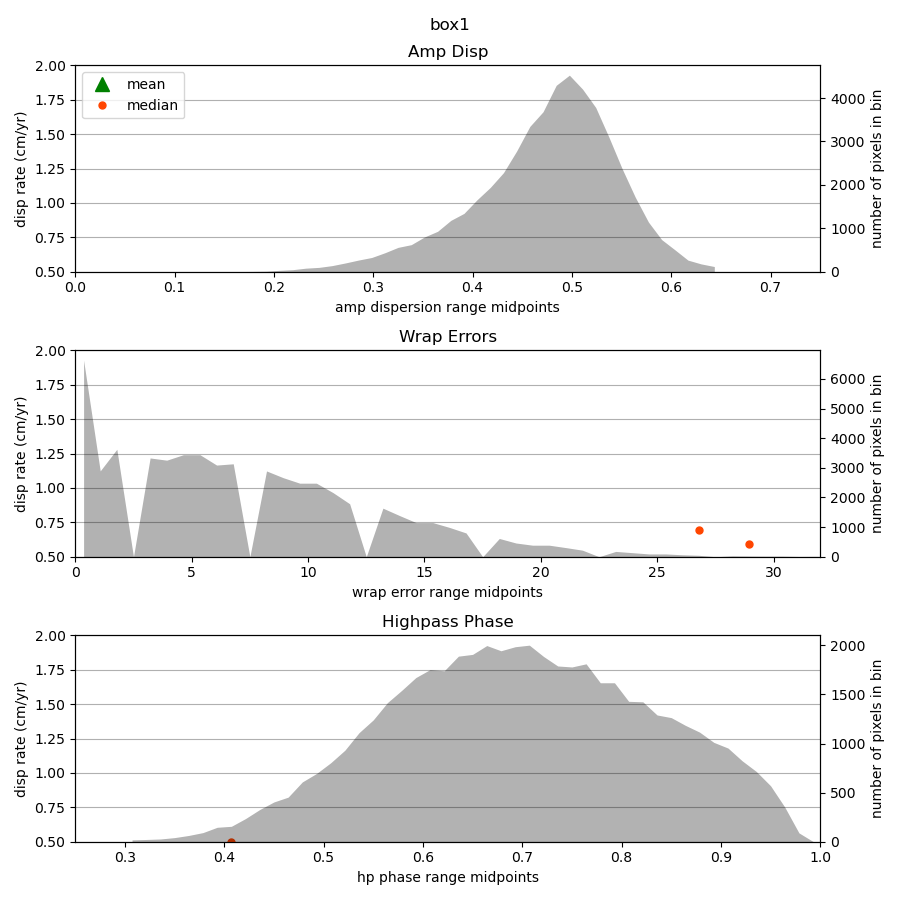

In [71]:
# plot it
plt.figure(figsize=(9,9),tight_layout=True)
ax1 = plt.subplot(3,1,1)
plt.plot(amp_disp_centers_2,np.nanmean(box_whisker_amp_disp_data,axis=0),'^',markersize=10,c='green',label='mean',zorder=5)
plt.plot(amp_disp_centers_2,np.nanmedian(box_whisker_amp_disp_data,axis=0),'.',markersize=10,c='orangered',label='median',zorder=10)
plt.legend(loc='upper left')
plt.xlabel('amp dispersion range midpoints')
plt.ylabel('disp rate (cm/yr)')
if boxKey == 'box1':
    plt.xlim([0,0.75])
    plt.ylim([0.5,2])
elif boxKey == 'box2':
    plt.xlim([0,0.65])
    plt.ylim([0,1.5])
elif boxKey == 'box3':
    plt.xlim([0,0.8])
    plt.ylim([-0.5,0.5])
elif boxKey == 'box4':
    plt.xlim([0,0.7])
    plt.ylim([0.4,1.2])
plt.grid(axis='y')
plt.title('Amp Disp')
ax2 = ax1.twinx()
lows = np.zeros(num_ranges)
ax2.fill_between(amp_disp_centers_2,lows,num_pix_amp_disp,color='k',alpha=0.3,zorder=0,linewidth=0)
ylow,yhigh = ax2.get_ylim()
plt.ylim([0,yhigh])
plt.ylabel('number of pixels in bin')
plt.xlabel('amp dispersion range midpoints')
if boxKey == 'box1':
    plt.xlim([0,0.75])
elif boxKey == 'box2':
    plt.xlim([0,0.65])
elif boxKey == 'box3':
    plt.xlim([0,0.8])
elif boxKey == 'box4':
    plt.xlim([0,0.7])

ax1 = plt.subplot(3,1,2)
plt.plot(wrap_err_centers_2,np.nanmean(box_whisker_wrap_err_data,axis=0),'^',markersize=10,c='green',label='mean',zorder=5)
plt.plot(wrap_err_centers_2,np.nanmedian(box_whisker_wrap_err_data,axis=0),'.',markersize=10,c='orangered',label='median',zorder=10)
plt.xlabel('wrap error range midpoints')
plt.ylabel('disp rate (cm/yr)')
if boxKey == 'box1':
    plt.xlim([0,32])
    plt.ylim([0.5,2])
elif boxKey == 'box2':
    plt.xlim([0,32])
    plt.ylim([0,1.5])
elif boxKey == 'box3':
    plt.xlim([0,30])
    plt.ylim([-0.5,0.5])
elif boxKey == 'box4':
    plt.xlim([0,30])
    plt.ylim([0.4,1.2])    
plt.grid(axis='y')
plt.title('Wrap Errors')
ax2 = ax1.twinx()
ax2.fill_between(wrap_err_centers_2,lows,num_pix_wrap_err,color='k',alpha=0.3,zorder=0,linewidth=0)
ylow,yhigh = ax2.get_ylim()
plt.ylim([0,yhigh])
plt.ylabel('number of pixels in bin')
plt.xlabel('wrap error range midpoints')
if boxKey == 'box1':
    plt.xlim([0,32])
elif boxKey == 'box2':
    plt.xlim([0,32])
elif boxKey == 'box3':
    plt.xlim([0,30])
elif boxKey == 'box4':
    plt.xlim([0,30])

ax1 = plt.subplot(3,1,3)
plt.plot(hp_phs_centers_2,np.nanmean(box_whisker_hp_phs_data,axis=0),'^',markersize=10,c='green',label='mean',zorder=5)
plt.plot(hp_phs_centers_2,np.nanmedian(box_whisker_hp_phs_data,axis=0),'.',markersize=10,c='orangered',label='median',zorder=10)
plt.xlabel('hp phase range midpoints')
plt.ylabel('disp rate (cm/yr)')
if boxKey == 'box1':
    plt.xlim([0.25,1])
    plt.ylim([0.5,2])
elif boxKey == 'box2':
    plt.xlim([0.3,1])
    plt.ylim([0,1.5]) 
elif boxKey == 'box3':
    plt.xlim([0.35,1])   
    plt.ylim([-0.5,0.5])
elif boxKey == 'box4':
    plt.xlim([0.3,1])
    plt.ylim([0.4,1.2])
plt.grid(axis='y')
plt.title('Highpass Phase')
ax2 = ax1.twinx()
ax2.fill_between(hp_phs_centers_2,lows,num_pix_hp_phs,color='k',alpha=0.3,zorder=-10,linewidth=0)
ylow,yhigh = ax2.get_ylim()
plt.ylim([0,yhigh])
plt.ylabel('number of pixels in bin')
plt.xlabel('highpass phase range midpoints')
if boxKey == 'box1':
    plt.xlim([0.25,1])
elif boxKey == 'box2':
    plt.xlim([0.3,1])
elif boxKey == 'box3':
    plt.xlim([0.35,1]) 
elif boxKey == 'box4':
    plt.xlim([0.3,1])
plt.suptitle(boxKey)

plt.show()

/tmp/ipykernel_28051/779623033.py:4: RuntimeWarning: Mean of empty slice
  plt.plot(amp_disp_centers_2,np.nanmean(box_whisker_amp_disp_data,axis=0),'^',markersize=10,c='green',label='mean',zorder=5)
/home/ocp4/software/anaconda3/envs/oliviaJupyter/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/tmp/ipykernel_28051/779623033.py:20: RuntimeWarning: Mean of empty slice
  plt.plot(wrap_err_centers_2,np.nanmean(box_whisker_wrap_err_data,axis=0),'^',markersize=10,c='green',label='mean',zorder=5)
/home/ocp4/software/anaconda3/envs/oliviaJupyter/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


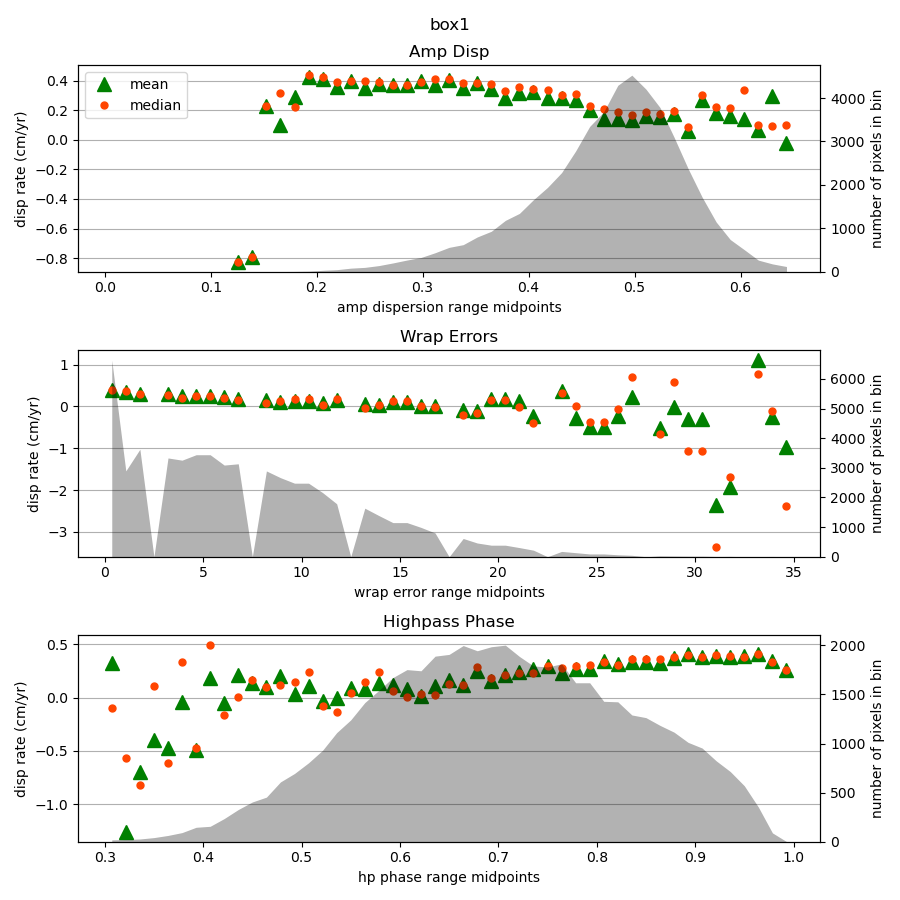

In [72]:
# plot it
plt.figure(figsize=(9,9),tight_layout=True)
ax1 = plt.subplot(3,1,1)
plt.plot(amp_disp_centers_2,np.nanmean(box_whisker_amp_disp_data,axis=0),'^',markersize=10,c='green',label='mean',zorder=5)
plt.plot(amp_disp_centers_2,np.nanmedian(box_whisker_amp_disp_data,axis=0),'.',markersize=10,c='orangered',label='median',zorder=10)
plt.legend(loc='upper left')
plt.xlabel('amp dispersion range midpoints')
plt.ylabel('disp rate (cm/yr)')
plt.grid(axis='y')
plt.title('Amp Disp')
ax2 = ax1.twinx()
lows = np.zeros(num_ranges)
ax2.fill_between(amp_disp_centers_2,lows,num_pix_amp_disp,color='k',alpha=0.3,zorder=0,linewidth=0)
ylow,yhigh = ax2.get_ylim()
plt.ylim([0,yhigh])
plt.ylabel('number of pixels in bin')
plt.xlabel('amp dispersion range midpoints')

ax1 = plt.subplot(3,1,2)
plt.plot(wrap_err_centers_2,np.nanmean(box_whisker_wrap_err_data,axis=0),'^',markersize=10,c='green',label='mean',zorder=5)
plt.plot(wrap_err_centers_2,np.nanmedian(box_whisker_wrap_err_data,axis=0),'.',markersize=10,c='orangered',label='median',zorder=10)
plt.xlabel('wrap error range midpoints')
plt.ylabel('disp rate (cm/yr)')
plt.grid(axis='y')
plt.title('Wrap Errors')
ax2 = ax1.twinx()
ax2.fill_between(wrap_err_centers_2,lows,num_pix_wrap_err,color='k',alpha=0.3,zorder=0,linewidth=0)
ylow,yhigh = ax2.get_ylim()
plt.ylim([0,yhigh])
plt.ylabel('number of pixels in bin')
plt.xlabel('wrap error range midpoints')

ax1 = plt.subplot(3,1,3)
plt.plot(hp_phs_centers_2,np.nanmean(box_whisker_hp_phs_data,axis=0),'^',markersize=10,c='green',label='mean',zorder=5)
plt.plot(hp_phs_centers_2,np.nanmedian(box_whisker_hp_phs_data,axis=0),'.',markersize=10,c='orangered',label='median',zorder=10)
plt.xlabel('hp phase range midpoints')
plt.ylabel('disp rate (cm/yr)')
plt.grid(axis='y')
plt.title('Highpass Phase')
ax2 = ax1.twinx()
ax2.fill_between(hp_phs_centers_2,lows,num_pix_hp_phs,color='k',alpha=0.3,zorder=-10,linewidth=0)
ylow,yhigh = ax2.get_ylim()
plt.ylim([0,yhigh])
plt.ylabel('number of pixels in bin')
plt.xlabel('highpass phase range midpoints')
plt.suptitle(boxKey)

plt.show()